In [1]:
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext
from pathlib import Path

In [2]:
!pip install --upgrade moviepy
!pip install torch torchvision torchaudio
import json
import os
from moviepy.editor import *
from moviepy import *
import numpy as np
from PIL import Image

In [3]:
import os

current_path = os.getcwd()
print(current_path)

new_path = r"D:\YeqinHUANG_Collection\ucl\week3"
os.chdir(new_path)

updated_path = os.getcwd()
print("newpath:", updated_path)


C:\Users\76392
newpath: D:\YeqinHUANG_Collection\ucl\week3


In [4]:
%cd video-classification-3d-cnn-pytorch/

D:\YeqinHUANG_Collection\ucl\week3\video-classification-3d-cnn-pytorch


In [5]:
from moviepy.editor import VideoFileClip
import os
import numpy as np
import tensorflow as tf


def load_image(img_file, target_size=(224, 224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file,
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    pooling='avg'
)

In [6]:
XVideo = VideoFileClip(r"../input_films/video1.mp4")
frames_directory = "../frames"
for i in range(int(XVideo.duration)):
    frameX = XVideo.get_frame(i)
    filename = f"{i}.jpg"
    
    try:
        img = Image.fromarray(frameX)
        img.save(os.path.join(frames_directory, filename), "JPEG")
    except Exception as e:
        print(f"Error: {str(e)}")

In [7]:
def opF(path):
    p = Path(path)
    
inputX_Path = "../image.jpg"
opF(inputX_Path)

inputX_image = load_image(inputX_Path)
featureinputX = model.predict(inputX_image)[0]

1/1 [==============================] - 1s 503ms/step


In [8]:
featureFrames = []
for i in range(int(XVideo.duration)):
    Frames_images_Path = f"../frames/{str(i)}.jpg"
    opF(Frames_images_Path)
    Frames_images = load_image(Frames_images_Path)
    featureFrames_images = model.predict(Frames_images)[0]
    featureFrames.append(featureFrames_images)

1/1 [==============================] - 0s 40ms/step


In [14]:
distances = []
for i, s in enumerate(featureFrames):
    distanceX = np.linalg.norm(s - featureinputX)
    distances.append((i, distanceX))

distances.sort(key=lambda x: x[1], reverse=False)
print(distances[0])

(7, 28.440603)


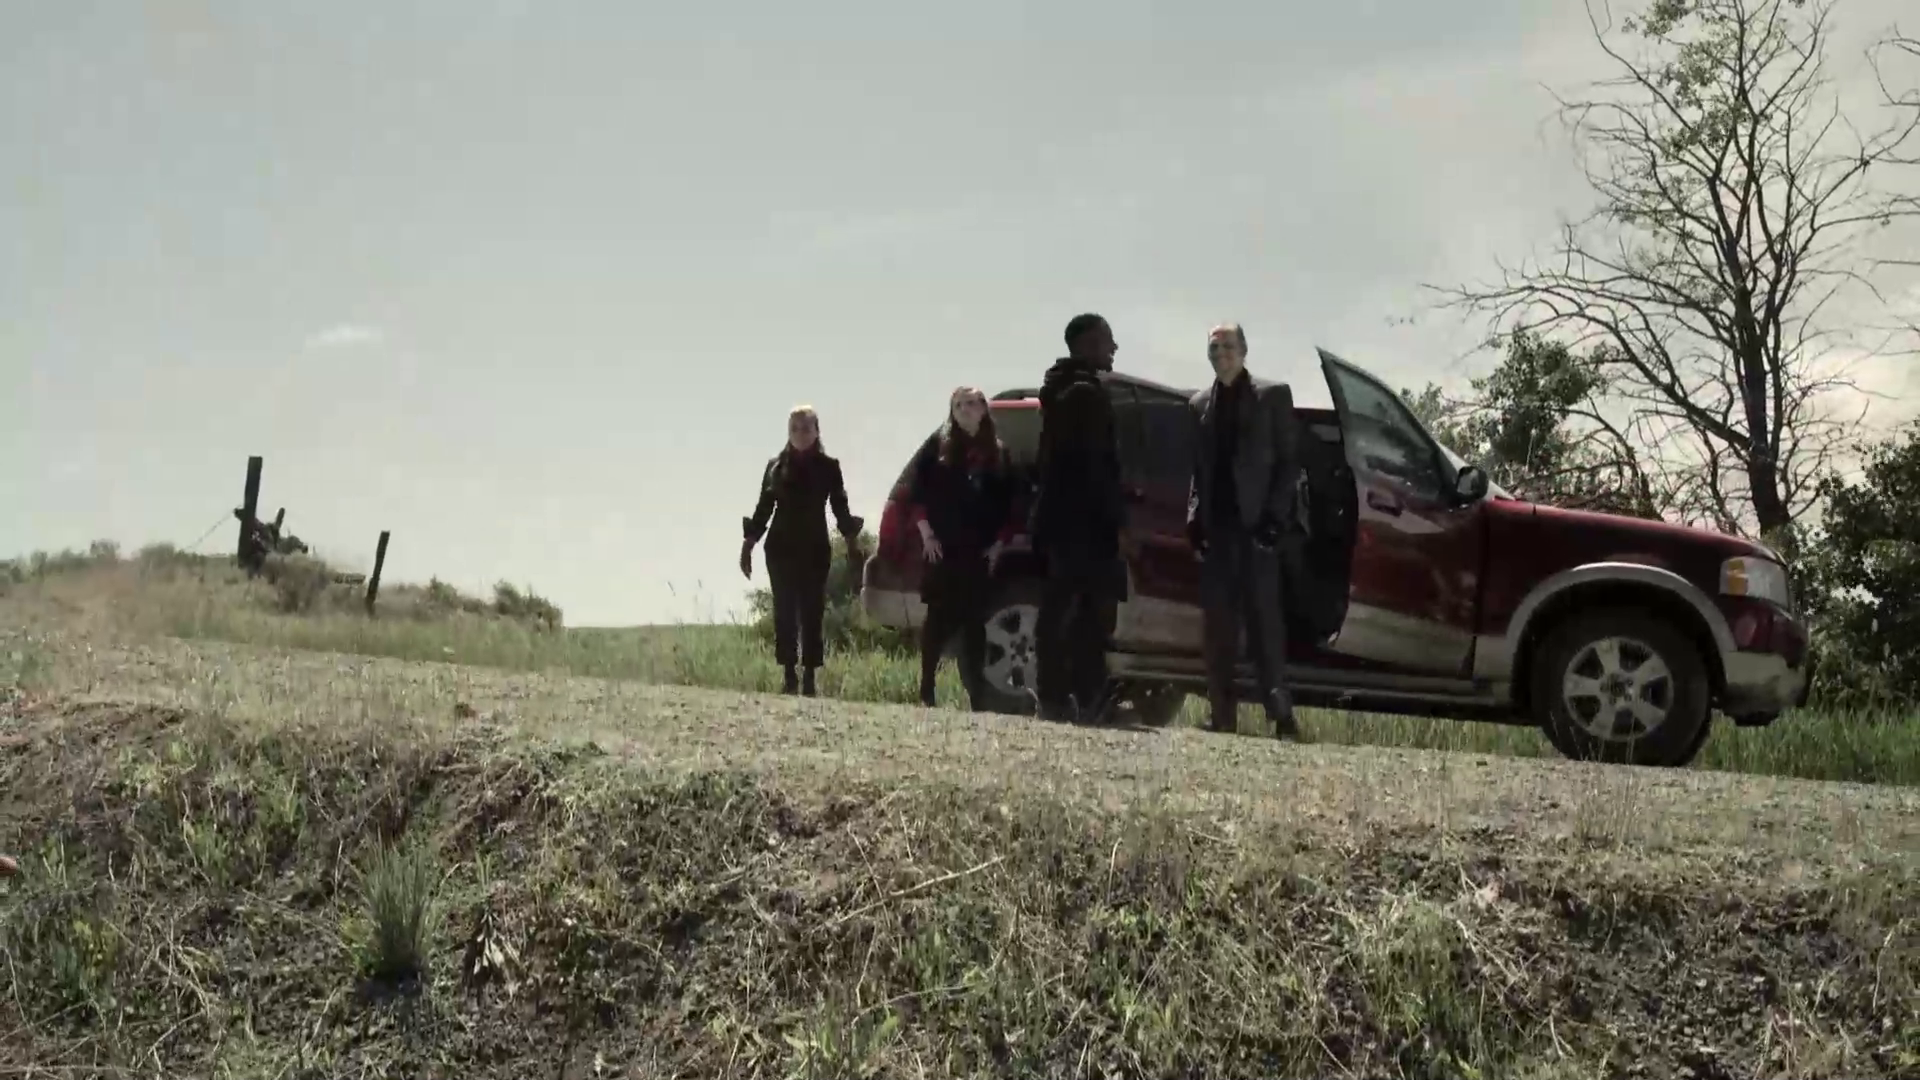

In [15]:
from moviepy.editor import VideoFileClip
from IPython.display import display, Image
from PIL import Image as PILImage
import io

video_path = r"../input_films/video1.mp4"
video_clip = VideoFileClip(video_path)
target_time = 7  
frame_at_target_time = video_clip.get_frame(target_time)

image_path = "frame_at_target_time.png"
pil_image = PILImage.fromarray(frame_at_target_time)
pil_image.save(image_path)
display(Image(filename=image_path))
video_clip.close()


In [10]:
print(distances[:20])

[(8, 32.585434), (2, 32.25408), (3, 32.189716), (14, 31.839037), (22, 31.825005), (19, 31.804533), (15, 31.720066), (23, 31.482239), (18, 31.414726), (21, 31.314863), (5, 31.276001), (12, 31.238989), (13, 30.999882), (20, 30.97572), (4, 30.55317), (1, 30.484653), (11, 29.763853), (25, 29.640629), (24, 29.625383), (10, 29.366564)]


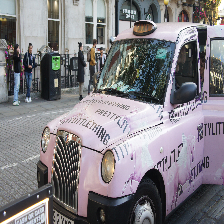

In [16]:
tf.keras.preprocessing.image.load_img(inputX_Path, target_size=(224,224))

In [19]:
from moviepy.editor import VideoFileClip

videoX = VideoFileClip(r"../input_films/video1.mp4")
subVideo = videoX.subclip(10, 26)
subVideo.write_videofile("../output_films/video1_10-26.mp4", audio_codec='aac')

Moviepy - Building video ../output_films/video1_10-26.mp4.
MoviePy - Writing audio in video1_10-26TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output_films/video1_10-26.mp4



Moviepy - Done !
Moviepy - video ready ../output_films/video1_10-26.mp4
